In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import sklearn
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

## Pretty variable display 
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

## RANDOM STATE
seed=3

In [2]:
## 
df_tr = pd.read_csv('../data/data4_tr.csv', index_col=0)
df_pca = pd.read_csv('../data/pca4_99.csv', index_col=0)

print(df_tr.head())
df_pca.head()

                  %PTS 2PT MR  %PTS 3PT  %PTS FBPS   %PTS FT  %PTS PITP  \
A.C. Green 96        0.793058 -1.287762   0.099520  0.613132   0.411805   
Aaron McKie 96      -0.361463  0.685454   0.959510  0.581281  -0.369327   
Adam Keefe 96       -0.530006 -1.556645   0.803148  2.014586   0.824689   
Allan Houston 96     0.641369  0.857355  -0.119386 -0.469810  -1.150458   
Allen Iverson 96    -0.597424  0.628982   0.896965  0.613132  -0.090351   

                  2FGM %UAST  3FGM %UAST       3P%       3PA       AST  ...  \
A.C. Green 96      -0.910112    0.799385 -1.407574 -1.106888 -1.325759  ...   
Aaron McKie 96      0.837207    0.703941  0.928161  0.194981  0.521763  ...   
Adam Keefe 96      -1.614676   -1.160535 -1.743168 -1.386675 -1.095233  ...   
Allan Houston 96    0.149553    1.025554  0.840906  0.971845 -0.130121  ...   
Allen Iverson 96    1.513589    1.577214  0.545583  0.957951  1.514393  ...   

                      OREB        PF      PITP       PTS       STL   TOT M

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,...,pc_11,pc_12,pc_13,pc_14,pc_15,pc_16,pc_17,pc_18,pc_19,pc_20
A.C. Green 96,2.262994,-0.954615,-0.709243,0.956851,-1.899330,-1.742215,1.105725,1.610906,0.422516,-0.276229,...,0.271631,0.854620,-0.552704,-0.396190,1.909814,-1.004303,-0.462028,-0.705110,-0.743259,-0.442593
Aaron McKie 96,-1.251521,-1.509594,2.182934,0.566610,-2.213953,0.844849,-1.272939,0.044213,-0.908074,-0.397991,...,0.764092,-0.360073,-1.010165,0.458713,0.397705,-0.006154,0.819093,0.322054,-0.360983,-0.249163
Adam Keefe 96,4.124080,-1.129996,1.536981,-0.247150,-1.758879,1.912438,-0.181046,2.026229,0.874233,0.262629,...,-0.319209,0.212916,-0.165395,-1.005554,0.528117,0.283356,-0.217234,-0.683139,-0.317000,-0.309436
Allan Houston 96,-2.779621,-0.085179,-0.093294,2.638744,0.030298,0.358511,-0.408214,-0.453987,-1.340510,1.075148,...,-0.804806,-0.490970,0.949968,0.294106,0.191065,-0.246595,-0.422479,-0.456542,0.099895,-0.215495
Allen Iverson 96,-4.121492,4.520122,0.120565,-2.010201,-0.629348,-1.955107,0.461433,-0.111130,-0.754242,-1.113446,...,-0.306600,0.046049,1.145681,-0.089270,-0.670159,-0.383251,-0.324967,-0.235113,0.117775,-0.284287


## Clustering with pca data4

### Determing number of clusters

Text(0.5, 0, 'Number components')

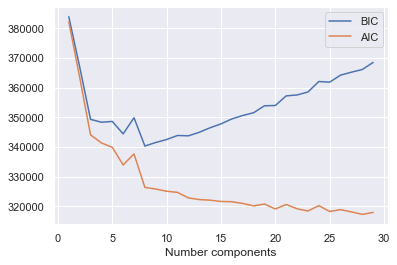

In [3]:
%%time

range_n_components = np.arange(1,30)
models = [GaussianMixture(n_components=n, covariance_type='full', random_state=seed).fit(df_pca) for n in range_n_components]
plt.plot(range_n_components, [model.bic(df_pca) for model in models], label='BIC')
plt.plot(range_n_components, [model.aic(df_pca) for model in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('Number components')

### Run with `n_components` == 15

In [5]:
gmm = GaussianMixture(n_components=15, covariance_type='full', random_state=15)
gmm.fit(df_pca)

GaussianMixture(n_components=15, random_state=15)

### Create df with player cluster labels

In [6]:
hard_labels = gmm.predict(df_pca)
soft_labels = gmm.predict_proba(df_pca)
df_clusters = pd.DataFrame(hard_labels, index=df_pca.index, columns=['label'])
soft_cols = [f'cluster_{n}' for n in range(gmm.n_components)]
df_clusters[soft_cols] = soft_labels
df_clusters.head()

,label,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14
A.C. Green 96,7,1.360543e-50,0.000000e+00,5.468735e-52,1.532081e-51,2.089226e-10,7.331849e-05,0.000000,9.999266e-01,1.443647e-84,4.102764e-61,1.085066e-41,7.830301e-64,5.089807e-55,0.000000,7.111909e-08
Aaron McKie 96,3,1.797726e-01,0.000000e+00,8.309997e-06,3.273073e-01,8.137178e-03,7.783535e-04,0.000000,1.580986e-37,3.166033e-01,1.606151e-01,9.821296e-10,6.777865e-03,3.885309e-16,0.000000,1.100797e-17
Adam Keefe 96,13,1.560742e-73,1.114794e-11,5.558267e-55,1.701828e-65,1.704524e-16,2.949176e-23,0.040877,9.785552e-37,7.794934e-112,1.335654e-71,6.409503e-68,1.030227e-60,2.185227e-70,0.959123,2.347355e-13
Allan Houston 96,8,2.685863e-10,0.000000e+00,3.480557e-01,8.429672e-04,1.962976e-08,9.792077e-10,0.000000,1.824318e-52,6.478338e-01,3.266618e-03,8.620151e-07,3.779503e-08,1.225728e-08,0.000000,8.321505e-30
Allen Iverson 96,2,4.519700e-19,0.000000e+00,9.886805e-01,1.549486e-07,3.743432e-06,1.371204e-14,0.000000,2.164076e-59,1.612061e-05,8.083097e-03,1.954953e-11,1.873253e-05,3.197613e-03,0.000000,4.067731e-23


In [7]:
df_clusters['label'].value_counts()

13    1351
8      748
6      651
9      605
3      592
1      556
11     440
2      430
5      385
4      357
0      339
10     293
12     276
14     178
7       45
Name: label, dtype: int64

In [8]:
for n in range(0,gmm.n_components):
    print('label:', n, 'total:', len(df_clusters[df_clusters['label']==n]))
    print(df_clusters[df_clusters['label']==n].sample(15)['label'])
    print('\n\n')

label: 0 total: 339
Mickael Pietrus 05     0
Dorell Wright 09       0
Reggie Bullock 19      0
Andre Roberson 14      0
Lance Thomas 16        0
Thabo Sefolosha 13     0
Kawhi Leonard 12       0
Ryan Anderson 08       0
Michael Beasley 11     0
Kyle Weaver 08         0
Morris Peterson 09     0
Maurice Harkless 19    0
Walter McCarty 99      0
Brent Barry 05         0
Rashad Vaughn 15       0
Name: label, dtype: int64



label: 1 total: 556
Doug McDermott 18             1
Shawn Marion 02               1
T.J. Ford 10                  1
Shawn Marion 14               1
Luke Walton 04                1
Rondae Hollis-Jefferson 17    1
Mehmet Okur 08                1
Alex Abrines 17               1
Timothe Luwawu-Cabarrot 19    1
Pat Garrity 04                1
Pascal Siakam 17              1
Larry Hughes 98               1
Fred Hoiberg 02               1
Marc Gasol 19                 1
Pat Garrity 05                1
Name: label, dtype: int64



label: 2 total: 430
George Hill 13             

## Investigate player labels

In [9]:
## with n clusters = 18
players  = ['Allen Iverson',
            'Stephon Marbury',
            'John Stockton',
            'Gilbert Arenas',
            'Chris Paul'
           ]
    
for player in players:
    print(df_clusters[df_clusters.index.str.contains(player)]['label'])

Allen Iverson 96     2
Allen Iverson 97    12
Allen Iverson 98    12
Allen Iverson 99    12
Allen Iverson 00    12
Allen Iverson 01    12
Allen Iverson 02    12
Allen Iverson 03    12
Allen Iverson 04    12
Allen Iverson 05    12
Allen Iverson 06    12
Allen Iverson 07    12
Allen Iverson 08    12
Allen Iverson 09     4
Name: label, dtype: int64
Stephon Marbury 96     9
Stephon Marbury 97     2
Stephon Marbury 98     9
Stephon Marbury 99    12
Stephon Marbury 00    12
Stephon Marbury 01     2
Stephon Marbury 02     2
Stephon Marbury 03     2
Stephon Marbury 04    12
Stephon Marbury 05    12
Stephon Marbury 06    11
Stephon Marbury 07     3
Name: label, dtype: int64
John Stockton 96    11
John Stockton 97    11
John Stockton 98    11
John Stockton 99    11
John Stockton 00    11
John Stockton 01    11
John Stockton 02    11
Name: label, dtype: int64
Gilbert Arenas 01     3
Gilbert Arenas 02     2
Gilbert Arenas 03     9
Gilbert Arenas 04     2
Gilbert Arenas 05     2
Gilbert Arenas 06  

## Clustering with non-PCA data4

## Determine number of clsuters

C:\Users\alexk\anaconda3\envs\nba\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


Wall time: 3min 49s


Text(0.5, 0, 'Number components')

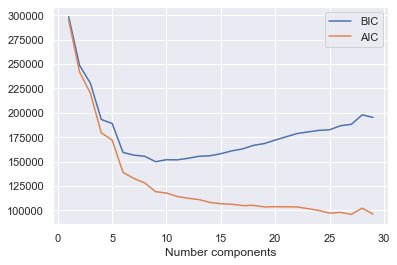

In [10]:
%%time

range_n_components = np.arange(1,30)
models = [GaussianMixture(n_components=n, covariance_type='full', random_state=seed).fit(df_tr) for n in range_n_components]
plt.plot(range_n_components, [model.bic(df_tr) for model in models], label='BIC')
plt.plot(range_n_components, [model.aic(df_tr) for model in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('Number components')

## Note: Non-PCA data has much lower BIC and AIC... 

### Run with `n_components` == 15

In [11]:
gmm = GaussianMixture(n_components=15, covariance_type='full', random_state=15)
gmm.fit(df_tr)

hard_labels = gmm.predict(df_tr)
soft_labels = gmm.predict_proba(df_tr)
df_clusters = pd.DataFrame(hard_labels, index=df_pca.index, columns=['label'])
soft_cols = [f'cluster_{n}' for n in range(gmm.n_components)]
df_clusters[soft_cols] = soft_labels
df_clusters.head()

,label,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14
A.C. Green 96,8,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.686605e-26,6.996809e-15,1.000000e+00,0.0,3.607148e-109,0.000000e+00,6.180808e-21,0.000000e+00,0.000000e+00
Aaron McKie 96,11,2.607808e-25,5.214197e-37,9.896252e-49,0.000000e+00,6.340358e-24,9.101454e-172,4.482324e-07,3.078475e-73,2.330720e-81,0.0,1.472594e-09,9.999996e-01,0.000000e+00,5.899718e-13,0.000000e+00
Adam Keefe 96,9,0.000000e+00,0.000000e+00,0.000000e+00,6.064964e-19,0.000000e+00,0.000000e+00,8.976815e-45,4.087030e-42,2.774461e-14,1.0,2.513349e-121,0.000000e+00,2.226352e-54,0.000000e+00,2.719504e-37
Allan Houston 96,1,1.261459e-35,9.954069e-01,1.151383e-05,0.000000e+00,4.548294e-03,5.462411e-18,8.122433e-28,5.777898e-49,1.047418e-189,0.0,7.229601e-15,2.033131e-25,0.000000e+00,3.327995e-05,0.000000e+00
Allen Iverson 96,1,2.932519e-165,9.763266e-01,4.425534e-26,0.000000e+00,7.322019e-09,2.367341e-02,2.848214e-21,1.081684e-11,2.267184e-76,0.0,1.114728e-08,1.720009e-60,0.000000e+00,3.339588e-84,0.000000e+00


In [85]:
# df_clusters['label'].value_counts()  ## old data 4

4     1392
3      691
10     490
6      487
17     463
5      416
12     410
16     397
0      352
7      348
11     343
1      319
14     298
13     267
15     239
2      176
8       83
9       75
Name: label, dtype: int64

In [12]:
df_clusters['label'].value_counts()

9     1417
13     816
1      636
0      553
4      549
11     524
10     465
5      406
7      379
3      373
2      315
6      276
8      263
12     149
14     125
Name: label, dtype: int64

In [13]:
for n in range(0,gmm.n_components):
    print('label:', n, 'total:', len(df_clusters[df_clusters['label']==n]))
    print(df_clusters[df_clusters['label']==n].sample(15)['label'])
    print('\n\n')

label: 0 total: 553
Milos Teodosic 17      0
Thon Maker 18          0
Jae Crowder 12         0
Channing Frye 15       0
George McCloud 98      0
Matt Bonner 05         0
John Salmons 12        0
Damon Stoudamire 07    0
Luke Babbitt 14        0
Pat Garrity 04         0
Vince Carter 19        0
Rasual Butler 07       0
Torrey Craig 18        0
Jason Williams 99      0
Mario Chalmers 10      0
Name: label, dtype: int64



label: 1 total: 636
Troy Murphy 07         1
Damon Stoudamire 96    1
Victor Oladipo 15      1
Chandler Parsons 13    1
Vince Carter 10        1
Shane Battier 01       1
Kerry Kittles 97       1
Jrue Holiday 17        1
Jimmy Butler 18        1
Victor Oladipo 14      1
Tobias Harris 14       1
Peja Stojakovic 05     1
Wally Szczerbiak 07    1
Jason Terry 09         1
Michael Finley 00      1
Name: label, dtype: int64



label: 2 total: 315
Brad Miller 10            2
Markieff Morris 17        2
Willy Hernangomez 18      2
Grant Long 96             2
Marc Gasol 18       

In [15]:
## with n clusters = 18
players  = ['Allen Iverson',
            'Stephon Marbury',
            'John Stockton',
            'Gilbert Arenas',
            'Chris Paul',
            'Jamal Crawford',
            'Lou Williams',
            'Derek Fisher'
            'Kobe Bryant',
            'LeBron James',
            'Tracy McGrady',
            'Paul Pierce',
            'Dirk',
            "Shaquille O'Neal",
            'Tim Duncan',
            'Dwight Howard'
           ]
    
for player in players:
    print(df_clusters[df_clusters.index.str.contains(player)]['label'])

Allen Iverson 96    1
Allen Iverson 97    5
Allen Iverson 98    5
Allen Iverson 99    5
Allen Iverson 00    5
Allen Iverson 01    5
Allen Iverson 02    5
Allen Iverson 03    5
Allen Iverson 04    5
Allen Iverson 05    5
Allen Iverson 06    5
Allen Iverson 07    5
Allen Iverson 08    5
Allen Iverson 09    7
Name: label, dtype: int64
Stephon Marbury 96    1
Stephon Marbury 97    1
Stephon Marbury 98    5
Stephon Marbury 99    5
Stephon Marbury 00    5
Stephon Marbury 01    5
Stephon Marbury 02    5
Stephon Marbury 03    1
Stephon Marbury 04    1
Stephon Marbury 05    7
Stephon Marbury 06    1
Stephon Marbury 07    4
Name: label, dtype: int64
John Stockton 96    10
John Stockton 97    10
John Stockton 98    10
John Stockton 99    10
John Stockton 00    10
John Stockton 01    10
John Stockton 02    10
Name: label, dtype: int64
Gilbert Arenas 01    10
Gilbert Arenas 02     1
Gilbert Arenas 03     4
Gilbert Arenas 04     5
Gilbert Arenas 05     5
Gilbert Arenas 06     5
Gilbert Arenas 09    

In [94]:
### KMeans

from sklearn.cluster import KMeans

km = KMeans(15)
labels = km.fit_predict(df_pca)
df_km = pd.DataFrame(labels, index=df_pca.index, columns=['KM label'])
df_km.head()

,KM label
A.C. Green 96,8
Aaron McKie 96,11
Adam Keefe 96,5
Allan Houston 96,4
Allen Iverson 96,2


In [96]:
for n in range(0,15):
    print('label:', n, 'total:', len(df_km[df_km['KM label']==n]))
    print(df_km[df_km['KM label']==n].sample(15)['KM label'])
    print('\n\n')

label: 0 total: 391
Markieff Morris 15      0
Brook Lopez 19          0
Ryan Gomes 07           0
Johnny Newman 99        0
Larry Johnson 00        0
Clifford Robinson 01    0
Lamar Odom 09           0
Michael Redd 01         0
Michael Beasley 13      0
Marreese Speights 15    0
Yi Jianlian 09          0
Serge Ibaka 13          0
Eddie Griffin 01        0
Derrick Williams 11     0
Dewayne Dedmon 19       0
Name: KM label, dtype: int32



label: 1 total: 541
Brandon Rush 08        1
Charlie Bell 09        1
DeAndre Liggins 17     1
Mike Miller 11         1
Maurice Harkless 17    1
Mike Penberthy 00      1
Jake Layman 19         1
Jason Kapono 09        1
Francisco Garcia 12    1
Mickael Pietrus 10     1
Treveon Graham 18      1
Kyle Korver 18         1
Pat Garrity 05         1
Dan Majerle 01         1
James Posey 09         1
Name: KM label, dtype: int32



label: 2 total: 445
Gilbert Arenas 06       2
Allen Iverson 00        2
Richard Jefferson 04    2
Steve Francis 02        2
Vince C